<a href="https://colab.research.google.com/github/Hujaifa98/AIProjects/blob/main/Google_Stock_Price_Prediction_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing  import StandardScaler , MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GOOG.csv to GOOG.csv


In [ ]:
data = pd.read_csv('GOOG.csv' , date_parser=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
4374,2022-01-03,2889.510010,2911.000000,2870.050049,2901.489990,2901.489990,1260700
4375,2022-01-04,2911.010010,2932.199951,2876.322998,2888.330078,2888.330078,1146400
4376,2022-01-05,2883.620117,2885.959961,2750.469971,2753.070068,2753.070068,2482100
4377,2022-01-06,2749.949951,2793.719971,2735.270020,2751.020020,2751.020020,1452500


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4.379000e+03
mean,665.744023,672.090389,659.409958,665.936222,665.936222,6.447541e+06
std,614.285763,619.951814,609.049592,614.735604,614.735604,7.801054e+06
min,49.409801,50.680038,47.800831,49.818268,49.818268,7.922000e+03
25%,246.269417,248.655479,242.515992,245.614380,245.614380,1.564600e+06
50%,415.691895,418.506348,413.241058,415.851288,415.851288,3.758435e+06
75%,956.160004,960.729981,949.755005,955.475006,955.475006,8.140499e+06
max,3020.000000,3037.000000,2997.750000,3014.179932,3014.179932,8.254163e+07


In [ ]:
data_training = data[data['Date'] < '2021-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
4117,2020-12-24,1735.000000,1746.000000,1729.109985,1738.849976,1738.849976,346800
4118,2020-12-28,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000
4119,2020-12-29,1787.790039,1792.439941,1756.089966,1758.719971,1758.719971,1299400
4120,2020-12-30,1762.010010,1765.094971,1725.599976,1739.520020,1739.520020,1306100


In [ ]:
data_test = data[data['Date'] >= '2021-01-01']
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
4122,2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1728.239990,1901900
4123,2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1740.920044,1145300
4124,2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,1735.290039,2602100
4125,2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,1787.250000,2265000
4126,2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,1807.209961,2050600
...,...,...,...,...,...,...,...
4374,2022-01-03,2889.510010,2911.000000,2870.050049,2901.489990,2901.489990,1260700
4375,2022-01-04,2911.010010,2932.199951,2876.322998,2888.330078,2888.330078,1146400
4376,2022-01-05,2883.620117,2885.959961,2750.469971,2753.070068,2753.070068,2482100
4377,2022-01-06,2749.949951,2793.719971,2735.270020,2751.020020,2751.020020,1452500


In [ ]:
train_data = data_training.drop(['Date' , 'Adj Close'] , axis=1)
train_data

,Open,High,Low,Close,Volume
0,49.813290,51.835709,47.800831,49.982655,44871361
1,50.316402,54.336334,50.062355,53.952770,22942874
2,55.168217,56.528118,54.321388,54.495735,18342897
3,55.412300,55.591629,51.591621,52.239197,15319808
4,52.284027,53.798351,51.746044,52.802086,9232276
...,...,...,...,...,...
4117,1735.000000,1746.000000,1729.109985,1738.849976,346800
4118,1751.635010,1790.728027,1746.334961,1776.089966,1393000
4119,1787.790039,1792.439941,1756.089966,1758.719971,1299400
4120,1762.010010,1765.094971,1725.599976,1739.520020,1306100


In [ ]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)

In [ ]:
df = pd.DataFrame(train_data,columns=['Open' , 'High' , 'Low' , 'Close', 'Volume'])
df

,Open,High,Low,Close,Volume
0,0.000227,0.000643,0.000000,0.000092,0.543577
1,0.000511,0.002035,0.001274,0.002325,0.277886
2,0.003244,0.003255,0.003674,0.002630,0.222151
3,0.003381,0.002734,0.002136,0.001361,0.185523
4,0.001619,0.001736,0.002223,0.001678,0.111765
...,...,...,...,...,...
4117,0.949569,0.943669,0.947297,0.949870,0.004106
4118,0.958941,0.968566,0.957002,0.970813,0.016782
4119,0.979308,0.969519,0.962498,0.961044,0.015648
4120,0.964785,0.954298,0.945319,0.950247,0.015729


In [ ]:
x_train =[]
y_train = []
for i in range(60,train_data.shape[0]):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i,0]) #ith row and 0th column single value

In [ ]:
x_train , y_train = np.array(x_train) , np.array(y_train)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(4062, 60, 5)
(4062,)


In [ ]:
model = keras.models.Sequential([
                                 keras.layers.LSTM(units=60,activation='relu',input_shape=(x_train.shape[1] , 5) , return_sequences=True , dropout=0.2),
                                 keras.layers.LSTM(units=60,activation='relu', return_sequences=True , dropout=0.2),
                                 keras.layers.LSTM(units=80,activation='relu', return_sequences=True , dropout=0.2),
                                 keras.layers.LSTM(units=120,activation='relu', dropout=0.2),
                                 keras.layers.Dense(1)

])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 60)            15840     
                                                                 
 lstm_17 (LSTM)              (None, 60, 60)            29040     
                                                                 
 lstm_18 (LSTM)              (None, 60, 80)            45120     
                                                                 
 lstm_19 (LSTM)              (None, 120)               96480     
                                                                 
 dense_4 (Dense)             (None, 1)                 121       
                                                                 
Total params: 186,601
Trainable params: 186,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(x_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
127/127 [==============================] - 26s 168ms/step - loss: 0.0098
Epoch 2/50
127/127 [==============================] - 21s 168ms/step - loss: 0.0011
Epoch 3/50
127/127 [==============================] - 22s 171ms/step - loss: 8.5544e-04
Epoch 4/50
127/127 [==============================] - 22s 172ms/step - loss: 8.3487e-04
Epoch 5/50
127/127 [==============================] - 22s 173ms/step - loss: 8.1709e-04
Epoch 6/50
127/127 [==============================] - 22s 169ms/step - loss: 8.4768e-04
Epoch 7/50
127/127 [==============================] - 21s 166ms/step - loss: 7.0148e-04
Epoch 8/50
127/127 [==============================] - 21s 169ms/step - loss: 6.7036e-04
Epoch 9/50
127/127 [==============================] - 21s 168ms/step - loss: 5.8062e-04
Epoch 10/50
127/127 [==============================] - 22s 174ms/step - loss: 6.3905e-04
Epoch 11/50
127/127 [==============================] - 21s 169ms/step - loss: 6.4444e-04
Epoch 12/50
127/127 [=================

In [ ]:
past_60_days = data_training.tail(60)
df = past_60_days.append(data_test , ignore_index=True)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-07,1464.290039,1468.959961,1436.000000,1460.290039,1460.290039,1746200
1,2020-10-08,1465.089966,1490.000000,1465.089966,1485.930054,1485.930054,1187800
2,2020-10-09,1494.699951,1516.520020,1489.449951,1515.219971,1515.219971,1435300
3,2020-10-12,1543.000000,1593.859985,1532.569946,1569.150024,1569.150024,2482600
4,2020-10-13,1583.729980,1590.000000,1563.199951,1571.680054,1571.680054,1601000
...,...,...,...,...,...,...,...
312,2022-01-03,2889.510010,2911.000000,2870.050049,2901.489990,2901.489990,1260700
313,2022-01-04,2911.010010,2932.199951,2876.322998,2888.330078,2888.330078,1146400
314,2022-01-05,2883.620117,2885.959961,2750.469971,2753.070068,2753.070068,2482100
315,2022-01-06,2749.949951,2793.719971,2735.270020,2751.020020,2751.020020,1452500


In [ ]:
df = df.drop(['Date' , 'Adj Close'] , axis=1)

In [ ]:
inputs = scaler.fit_transform(df)
inputs

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.51404967e-01],
       [5.14187747e-04, 1.34180496e-02, 1.86265190e-02, 1.65005353e-02,
        2.11184491e-01],
       [1.95472889e-02, 3.03308958e-02, 3.42243964e-02, 3.53499513e-02,
        2.73334505e-01],
       ...,
       [9.12335920e-01, 9.03675904e-01, 8.41664781e-01, 8.31963728e-01,
        5.36197675e-01],
       [8.26413627e-01, 8.44850882e-01, 8.31932140e-01, 8.30644428e-01,
        2.77653617e-01],
       [8.31652488e-01, 8.26595608e-01, 8.19452556e-01, 8.23610511e-01,
        1.56517590e-01]])

In [ ]:
inputs.shape[0]

317

In [ ]:
x_test =[]
y_test = []
for i in range(60,inputs.shape[0]):
  x_test.append(inputs[i-60 : i])
  y_test.append(inputs[i , 0])

In [ ]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(257, 60, 5)
(257,)


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
scaler.scale_ #Scaling labels for each column

array([6.42793339e-04, 6.37738817e-04, 6.40307348e-04, 6.43546241e-04,
       2.51111167e-07])

In [ ]:
scale = 1/6.42793339e-04
y_pred = y_pred * scale
y_test = y_test * scale

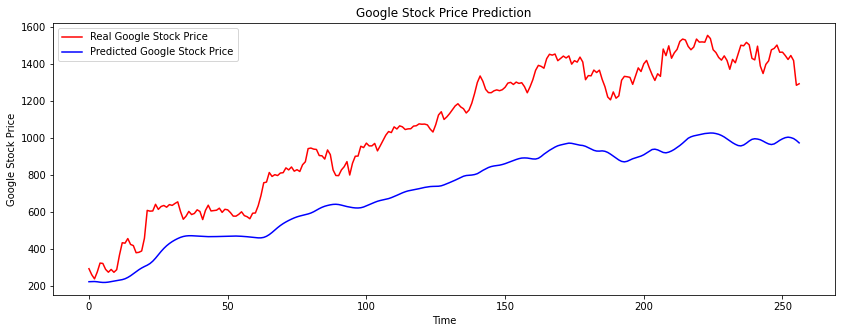

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red' , label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()